In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import power_transform

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Q.2 
Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters.

To draw the inferences from the clusters obtained.

In [2]:
Airlines=pd.read_excel("Airlines.xlsx",sheet_name='data')

In [3]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
Airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
airline1=Airlines.drop('ID#', axis=1)

In [7]:
airline1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
Airlines[Airlines.duplicated(keep = False)]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


## Checking for outliers with boxplot

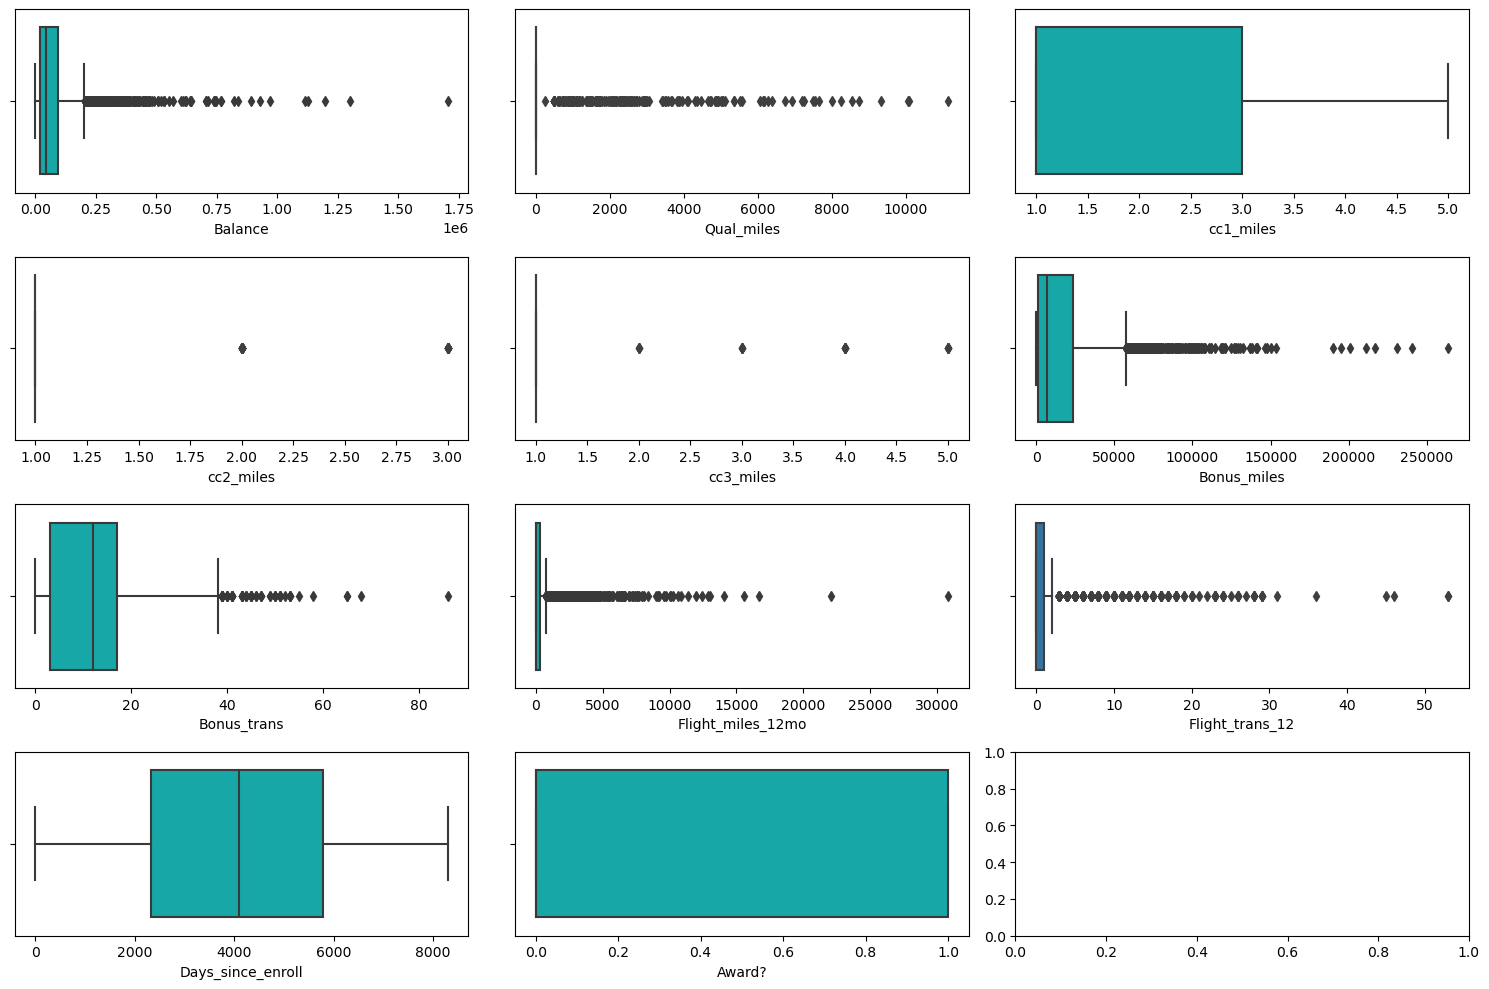

In [9]:
fig, ax = plt.subplots(4,3,figsize=(15,10))
sns.boxplot(airline1.Balance,ax=ax[0,0],color='c')
sns.boxplot(airline1.Qual_miles,ax=ax[0,1])
sns.boxplot(airline1.cc1_miles, ax=ax[0,2],color='c')
sns.boxplot(airline1.cc2_miles, ax=ax[1,0])
sns.boxplot(airline1.cc3_miles, ax=ax[1,1])
sns.boxplot(airline1.Bonus_miles, ax=ax[1,2],color='c')
sns.boxplot(airline1.Bonus_trans, ax=ax[2,0],color='c')
sns.boxplot(airline1.Flight_miles_12mo, ax=ax[2,1],color='c')
sns.boxplot(airline1. Flight_trans_12, ax=ax[2,2])
sns.boxplot(airline1.Days_since_enroll, ax=ax[3,0],color='c')
sns.boxplot(airline1["Award?"] , ax=ax[3,1],color='c')
plt.tight_layout()
plt.show()

### Cheking if the data is normally distributed using distplot

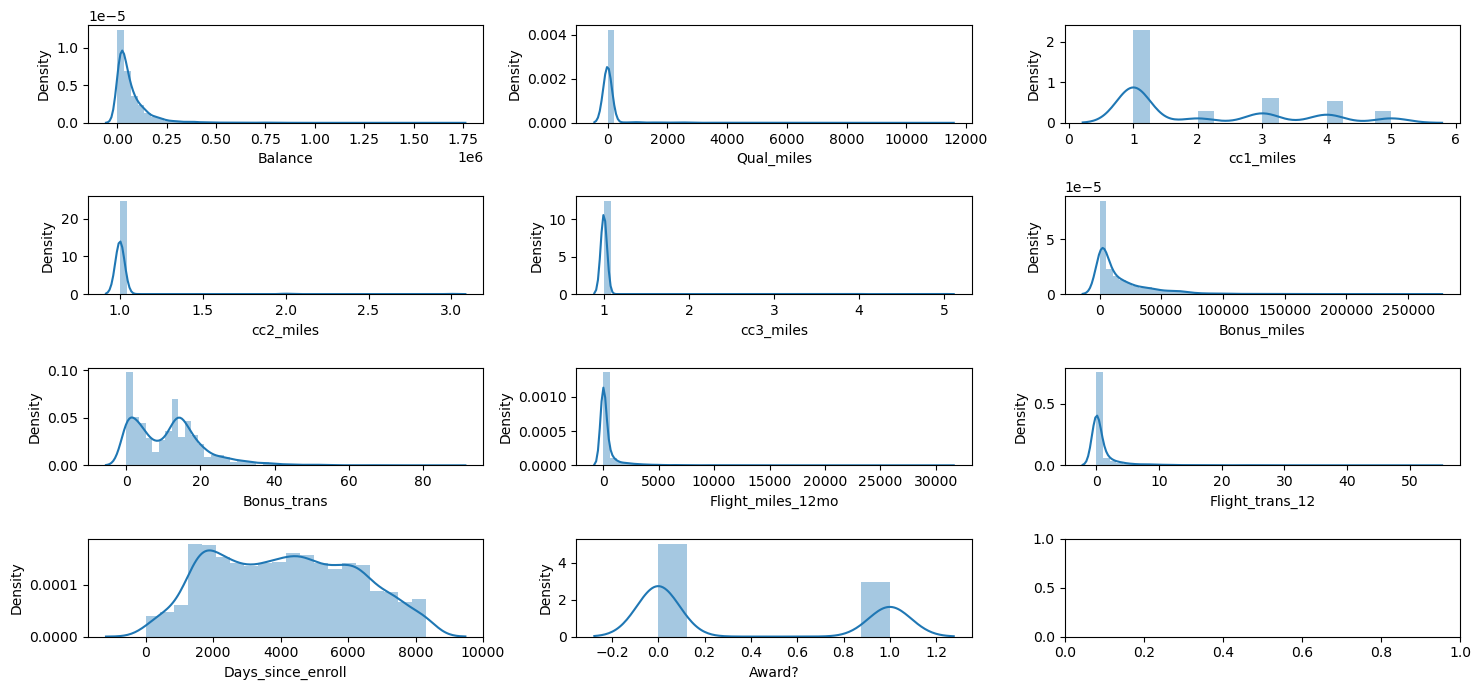

In [10]:
fig,ax=plt.subplots(4,3,figsize=(15,7))
sns.distplot(airline1.Balance, ax=ax[0,0])
sns.distplot(airline1.Qual_miles,ax=ax[0,1])
sns.distplot(airline1.cc1_miles, ax=ax[0,2])
sns.distplot(airline1.cc2_miles, ax=ax[1,0])
sns.distplot(airline1.cc3_miles, ax=ax[1,1])
sns.distplot(airline1.Bonus_miles, ax=ax[1,2])
sns.distplot(airline1.Bonus_trans, ax=ax[2,0])
sns.distplot(airline1.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(airline1. Flight_trans_12, ax=ax[2,2])
sns.distplot(airline1.Days_since_enroll, ax=ax[3,0])
sns.distplot(airline1["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

In [11]:
df = airline1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values
df1 = power_transform(df, method='yeo-johnson')


In [12]:
df=pd.DataFrame(df1,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]) 
df1

array([[-0.34681596, -0.2447433 , -0.84476649, ..., -0.67497033,
         1.32177629, -0.7669193 ],
       [-0.63308351, -0.2447433 , -0.84476649, ..., -0.67497033,
         1.30887295, -0.7669193 ],
       [-0.03854858, -0.2447433 , -0.84476649, ..., -0.67497033,
         1.33546799, -0.7669193 ],
       ...,
       [ 0.46038842, -0.2447433 ,  1.05859057, ..., -0.67497033,
        -1.36534468,  1.30391816],
       [ 0.20090435, -0.2447433 , -0.84476649, ...,  1.08107747,
        -1.365977  , -0.7669193 ],
       [-1.80332051, -0.2447433 , -0.84476649, ..., -0.67497033,
        -1.36787473, -0.7669193 ]])

## hierarchical clustering

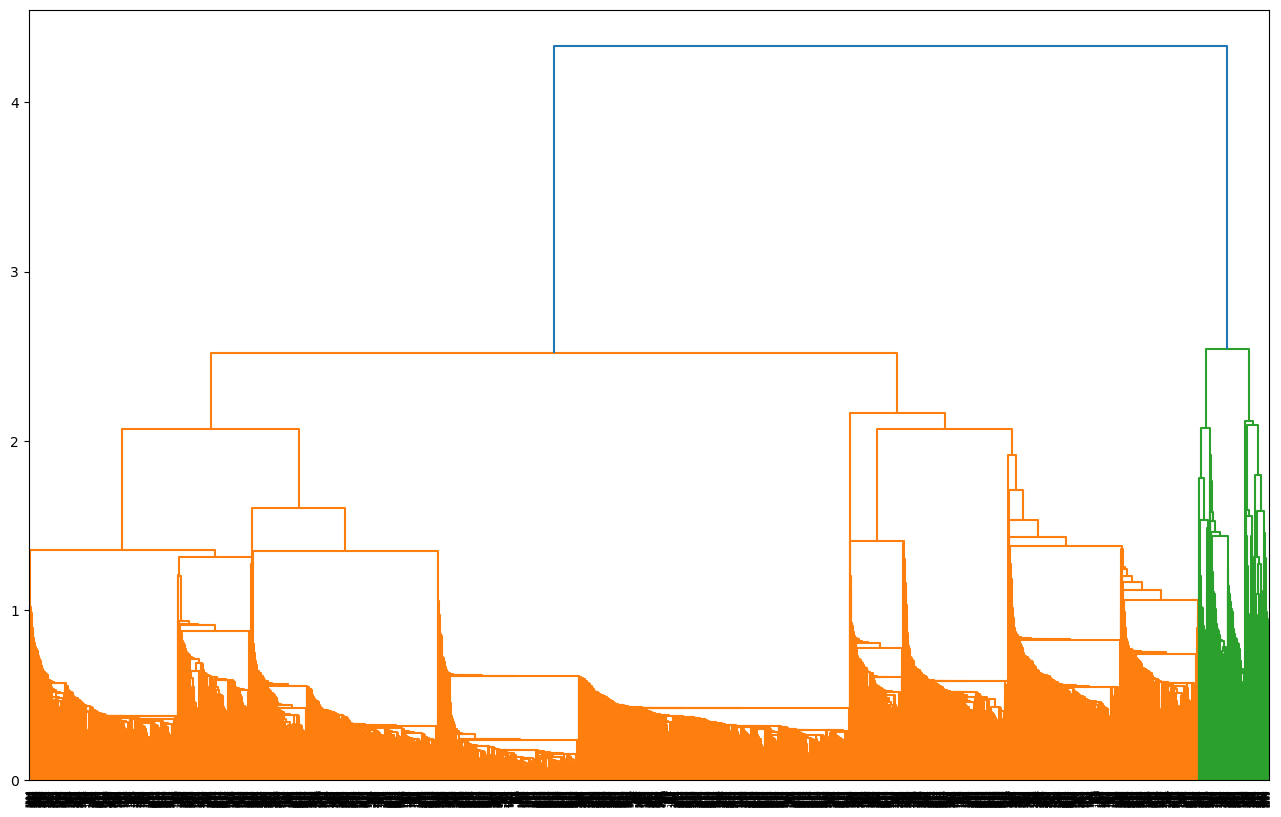

In [51]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df1, method='single'))

In [14]:
hc= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [15]:
hc1=hc.fit_predict(df1)
clusters=pd.DataFrame(hc1)

In [16]:
Airlines['cluster1'] = hc1

In [17]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster1'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 3773

cluster 1
Total Members: 151

cluster 2
Total Members: 75



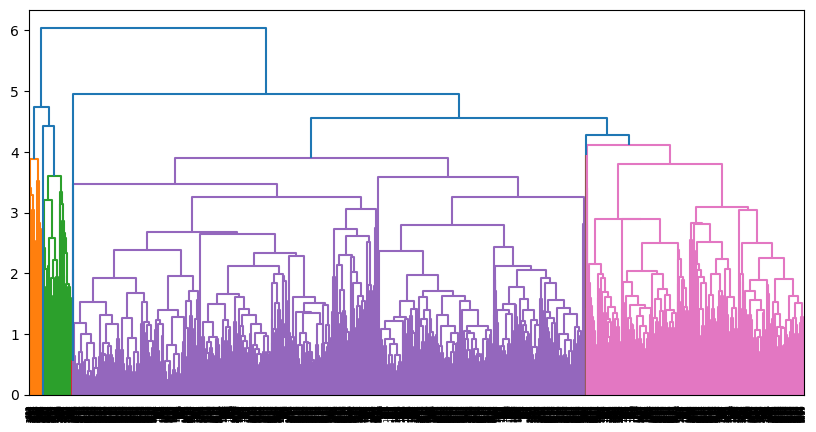

In [18]:
fig=plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(df1,method='average'))

In [52]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [20]:
hc2=hc.fit_predict(df1)
clusters=pd.DataFrame(hc2)

In [21]:
Airlines['cluster2'] = hc2

In [53]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster2'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 3771

cluster 1
Total Members: 151

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 0



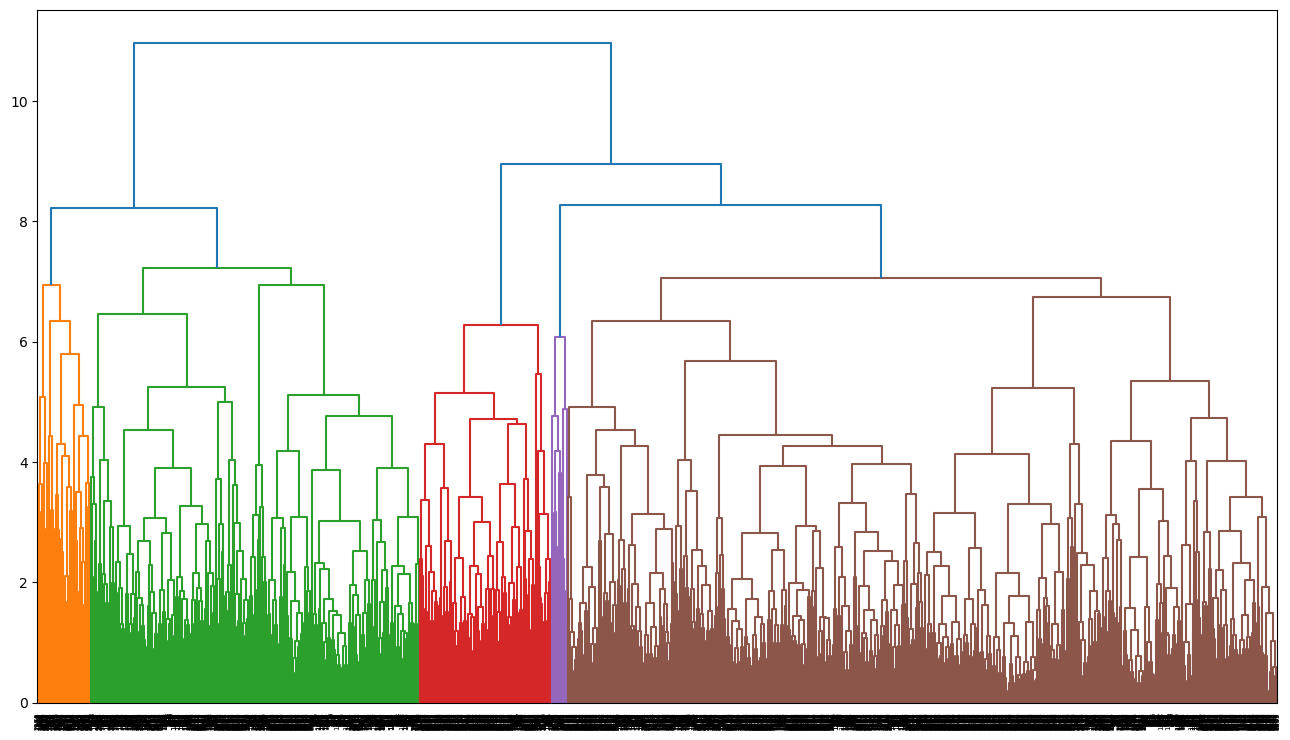

In [23]:
fig=plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(df1,method='complete'))

In [54]:
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [55]:
hc3=hc.fit_predict(df1)
clusters=pd.DataFrame(hc3)

In [26]:
Airlines['cluster3'] = hc3

In [56]:
for i in range(6):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster3'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 552

cluster 1
Total Members: 173

cluster 2
Total Members: 509

cluster 3
Total Members: 53

cluster 4
Total Members: 1141

cluster 5
Total Members: 424



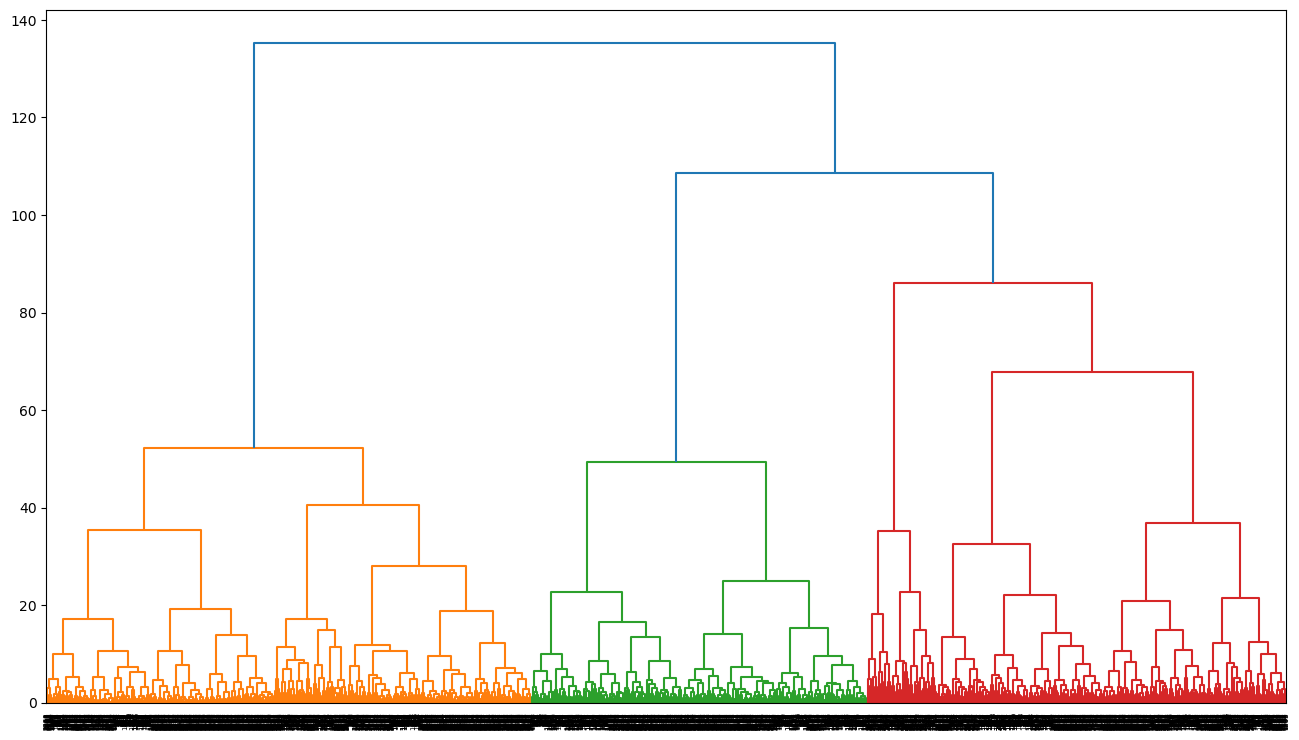

In [28]:
fig=plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(df1,method='ward'))

In [59]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [60]:
hc4=hc.fit_predict(df1)
clusters=pd.DataFrame(hc4)

In [61]:
Airlines['cluster4'] = hc4

In [62]:
for i in range(4):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster4'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1125

cluster 1
Total Members: 1567

cluster 2
Total Members: 1081

cluster 3
Total Members: 226



## K means clustering

### <span style='color:indigo'>Plotting elbow curve to determine the best number of clusters to be used in KMeans

In [63]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(df1)
    wcss.append(km.inertia_)

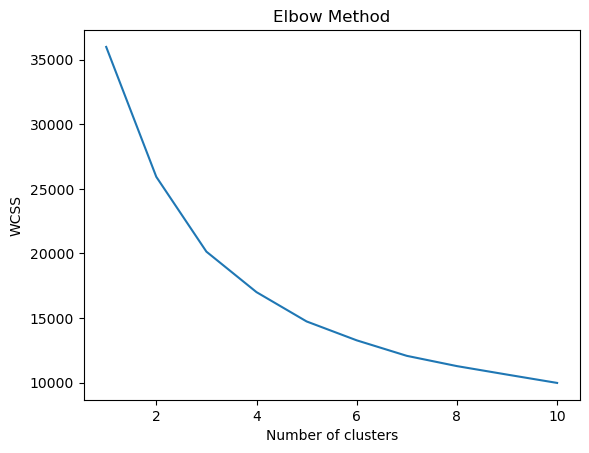

In [64]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Creating a Kmeans cluster with 5 groups

In [65]:
k5 = KMeans(5, random_state=42)
k5.fit(df1)

KMeans(n_clusters=5, random_state=42)

In [66]:
Airlines['cluster'] = k5.labels_

In [67]:
k5.cluster_centers_

array([[-6.75212840e-01, -2.32991180e-01, -8.35590446e-01,
         4.66045113e-19, -2.69630192e-33, -9.09080934e-01,
        -8.19433548e-01, -6.82084186e-01, -6.73778986e-01,
        -3.10971055e-01, -5.14035484e-01],
       [ 3.71613101e-01, -2.44743303e-01,  9.10506666e-01,
         2.91327607e-19,  2.55720899e-18,  7.17781846e-01,
         5.92471428e-01, -6.83308041e-01, -6.74970335e-01,
         2.39016631e-01,  1.81555873e-01],
       [ 1.60074522e-02, -2.44743303e-01, -8.19239258e-01,
         7.32640630e-19,  1.15555797e-33, -2.79105284e-01,
        -2.72262658e-01,  1.45172819e+00,  1.43587521e+00,
        -9.52588092e-02,  7.15349601e-02],
       [ 7.54505594e-01, -2.44743303e-01,  1.11374957e+00,
         2.77052025e-19,  2.98460591e-18,  1.03665259e+00,
         1.04603128e+00,  1.45646102e+00,  1.41053352e+00,
         3.58290326e-01,  6.72519442e-01],
       [ 5.95617244e-01,  4.08591363e+00,  6.27073775e-02,
         1.71909534e-19,  1.23462301e-18,  3.71406537e-01,
  

In [68]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1474

cluster 1
Total Members: 1179

cluster 2
Total Members: 573

cluster 3
Total Members: 551

cluster 4
Total Members: 222



## Applying DBSCAN clustering technique

In [69]:
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(df1)

DBSCAN(eps=0.8, min_samples=6)

In [70]:
dbscan.labels_

array([0, 0, 0, ..., 4, 6, 0])

In [71]:
db=pd.DataFrame(dbscan.labels_,columns=['cluster_DB'])


In [72]:
Airlines['cluster_DB'] = db.cluster_DB

In [73]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster1,cluster2,cluster3,cluster4,cluster,cluster_DB
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,4,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,4,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,4,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,4,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,2,0,3,1


# Silhouette score

In [74]:
s1=(metrics.silhouette_score(df1,hc1))
s1

0.31646635552390645

In [75]:
s2=(metrics.silhouette_score(df1,hc2))
s2

0.19291046876491424

In [76]:
s3=(metrics.silhouette_score(df1,hc3))
s3

0.19203614733255683

In [77]:
s4=(metrics.silhouette_score(df1,hc4))
s4

0.3093891280230929

In [78]:
s5=(metrics.silhouette_score(df1,k5.labels_))
s5

0.32518610185189556

In [79]:
s6=(metrics.silhouette_score(df1,db.cluster_DB))
s6

0.2340657983934542

In [80]:
SL={'Model':['Single','Average','Complete','Ward','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
T=pd.DataFrame(SL)
T

,Model,Sillhouette score
0,Single,0.316466
1,Average,0.192910
2,Complete,0.192036
3,Ward,0.309389
4,Kmeans,0.325186
5,DBScan,0.234066


### Conclusion:

####  All clusters are good to classify the Airlines dataset. From different models and visualizations, 
#### it is evident that the hiererachial clustering with single linkage method and Kmeans clustering have the highest silhouette score.

#### Higher the silhouette score, more far are the clusters seperated from each other